# CS422 - Homework 2 

## By: Laura Pereda

### Recitation Problems - Chapter 3

#### Exercise #2 - Utilize Table 3.5 
a. Compute the Gini index for overall collection of training examples
    
Gini = 1 - $ $$\left( \frac{5}{10} \right)$$^2 $ - $ $$\left( \frac{5}{10} \right)$$^2 $ = 0.5

b. Compute the Gini index for the __Customer ID__ attribute

Since Customer ID is a unique attribute, the split would result in one node per leaf. This will lead to a Gini of 0 for each Customer ID, which means the overall would also be 0.

c. Compute the Gini index for the __Gender__ attribute

Males - Total Males: 6 in Class 0 & 4 in Class 1.

Gini = 1 - $ $$\left( \frac{6}{10} \right)$$^2 $ - $ $$\left( \frac{4}{10} \right)$$^2 $ = 0.48

Female - Total Females: 4 in Class 0 & 6 in Class 1.

Gini = 1 - $ $$\left( \frac{4}{10} \right)$$^2 $ - $ $$\left( \frac{6}{10} \right)$$^2 $ = 0.48

Weighted Gini = ($\frac{10}{20}$) * (0.48) + ($\frac{10}{20}$) * (0.48) = 0.48


### Practicum Problems

#### Problem 1 - Iris Dataset

In [12]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt

%matplotlib inline

In [80]:
#Load iris dataset
iris = load_iris()

#Create dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

#Set up data as samples and features
X = iris.data
y = iris.target

#Using the train_test_split function to make a split
#Note: the "test_size = 0.2" indicates the percentage of the data that should be held for testing. In this case, 80/20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self, total = 150. X_train = 120/150 = 0.8 & X_test = 30/150 = 0.2
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


[Text(167.4, 163.07999999999998, 'X[2] <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [37, 42, 41]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.5\nsamples = 83\nvalue = [0, 42, 41]')]

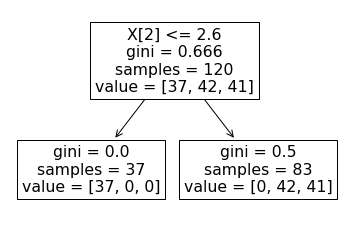

In [81]:
#Defining and fitting a decision tree instance
#DecisionTreeClassifier parameters are: min of 2 instances in leaves, no splits of subsets below 5, and a maximal tree depth
#from 1 to 5
classifier = tree.DecisionTreeClassifier(max_depth=1, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [82]:
#Look at main classification metrics for tree of depth 1
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [2 0 1 0 1 0 2 2 2 1 0 0 1 1 2 0 0 0 0 0 0 1 2 0 1 2 2 1 2 0]
Predicted: [1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.47      1.00      0.64         8
           2       0.00      0.00      0.00         9

    accuracy                           0.70        30
   macro avg       0.49      0.67      0.55        30
weighted avg       0.56      0.70      0.60        30



C:\Users\dokur\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[Text(133.92000000000002, 181.2, 'X[3] <= 0.7\ngini = 0.666\nsamples = 120\nvalue = [37, 42, 41]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.5\nsamples = 83\nvalue = [0, 42, 41]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]')]

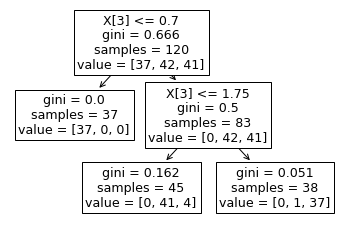

In [83]:
#For tree depth of 2
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)

In [84]:
#Look at main classification metrics for tree of depth 2
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [2 0 1 0 1 0 2 2 2 1 0 0 1 1 2 0 0 0 0 0 0 1 2 0 1 2 2 1 2 0]
Predicted: [1 0 1 0 1 0 2 2 2 1 0 0 1 1 2 0 0 0 0 0 0 1 2 0 1 2 2 1 2 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



[Text(125.55000000000001, 190.26, 'X[3] <= 0.7\ngini = 0.666\nsamples = 120\nvalue = [37, 42, 41]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.75\ngini = 0.5\nsamples = 83\nvalue = [0, 42, 41]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 5.35\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(41.85, 27.180000000000007, 'gini = 0.089\nsamples = 43\nvalue = [0, 41, 2]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(209.25, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

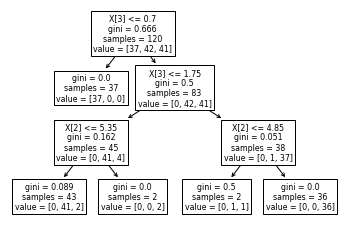

In [85]:
#For tree depth of 3
classifier = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)

In [86]:
#Look at main classification metrics for tree of depth 3
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [2 0 1 0 1 0 2 2 2 1 0 0 1 1 2 0 0 0 0 0 0 1 2 0 1 2 2 1 2 0]
Predicted: [1 0 1 0 1 0 2 2 2 1 0 0 1 1 2 0 0 0 0 0 0 1 2 0 1 2 2 1 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      1.00      0.89         8
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



[Text(148.8, 195.696, 'X[3] <= 0.7\ngini = 0.666\nsamples = 120\nvalue = [37, 42, 41]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(186.0, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 83\nvalue = [0, 42, 41]'),
 Text(111.60000000000001, 108.72, 'X[2] <= 5.35\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(74.4, 65.232, 'X[3] <= 1.65\ngini = 0.089\nsamples = 43\nvalue = [0, 41, 2]'),
 Text(37.2, 21.744, 'gini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(111.60000000000001, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(260.40000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(223.20000000000002, 65.232, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

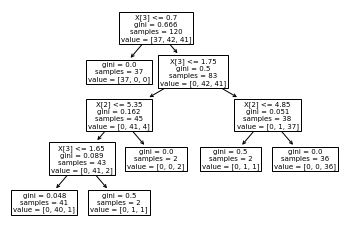

In [87]:
#For tree depth of 4
classifier = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)

In [88]:
#Look at main classification metrics for tree of depth 4
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [2 0 1 0 1 0 2 2 2 1 0 0 1 1 2 0 0 0 0 0 0 1 2 0 1 2 2 1 2 0]
Predicted: [1 0 1 0 1 0 2 2 2 1 0 0 1 1 2 0 0 0 0 0 0 1 2 0 1 2 2 1 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      1.00      0.89         8
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



[Text(167.40000000000003, 199.32, 'X[2] <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [37, 42, 41]'),
 Text(133.92000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 83\nvalue = [0, 42, 41]'),
 Text(133.92000000000002, 126.83999999999999, 'X[2] <= 5.35\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(100.44000000000001, 90.6, 'X[3] <= 1.65\ngini = 0.089\nsamples = 43\nvalue = [0, 41, 2]'),
 Text(66.96000000000001, 54.359999999999985, 'X[2] <= 4.95\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(167.40000000000003, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.840000

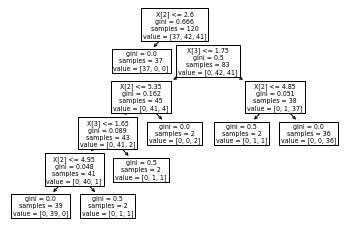

In [89]:
#For tree depth of 5
classifier = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
classifier = classifier.fit(X_train, y_train)

expected = y_test
predicted = classifier.predict(X_test)

tree.plot_tree(classifier)

In [90]:
#Look at main classification metrics for tree of depth 5
print("Expected: ", expected)
print("Predicted:", predicted)
print(metrics.classification_report(expected, predicted))

Expected:  [2 0 1 0 1 0 2 2 2 1 0 0 1 1 2 0 0 0 0 0 0 1 2 0 1 2 2 1 2 0]
Predicted: [1 0 1 0 1 0 2 2 2 1 0 0 1 1 2 0 0 0 0 0 0 1 2 0 1 2 2 1 1 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      1.00      0.89         8
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30

